# Práctica 1

## Preparación de entorno

In [21]:
import numpy as np
from matplotlib import pyplot as plt

## SETUP 

### Variables a definir

In [22]:
valor1_and = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
valor2_and =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie

neurona_and = [valor1_and,valor2_and] # Generamos una matriz de pesos aleatoria en intervalo -1,1

valor1_xor = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
valor2_xor =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie

neurona_xor = [valor1_xor,valor2_xor] # Generamos una matriz de pesos aleatoria en intervalo -1,1

umbral = 0.6# Final
learning_rate = 0.3 # TOCAR
n_iteraciones = 20 # TOCAR

# Definimos las 4 posibles entradas binarias que tendrán tanto AND como XOR

entradas = [[0,0],[0,1],[1,0],[1,1]] # Para el entramiento, elegiremos aleatoriamente una de estas entradas constantemente (2 entradas)

### Funciones de entrenamiento

#### Función de activación

In [23]:
def funcionActivacion(neurona,entradas,umbral):
    if((np.dot(neurona,entradas) - umbral) < 0):
        return 0
    else:
        return 1

#### Función de aprendizaje

In [24]:
def aprendizaje(neurona,learning_rate,expected,obtenido,entradas):
    neuronaN = np.array(neurona) + np.array((learning_rate*(expected-obtenido))*np.transpose(entradas)) # Convertimos por seguridad ambos a np.array (suma de vectores)
    return neuronaN

## Entrenamiento

In [25]:
def entrenamiento_and(entradas,neurona,umbral,learning_rate, iteraciones, mostrar):
    if(mostrar):
        print("======================== NEURONA AND ========================")
    for i in range(iteraciones):
        for entrada in entradas:
            neurona_antes = neurona
            expected = entrada[0] * entrada[1]
            salida_obtenida = funcionActivacion(neurona, entrada,umbral)
            neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
            error = abs(expected-salida_obtenida)
            if(mostrar):
                print(i+1," ",entrada," ",neurona_antes," ",expected," ",salida_obtenida," ",error," ", neurona)
    return neurona

def entrenamiento_xor(entradas,neurona,umbral,learning_rate,iteraciones,mostrar):
    if(mostrar):
        print("======================== NEURONA XOR ========================")
    for i in range(iteraciones):
        for entrada in entradas:
            neurona_antes = neurona
            expected = entrada[0] ^ entrada[1]
            salida_obtenida = funcionActivacion(neurona, entrada,umbral)
            neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
            error = abs(expected-salida_obtenida)
            if(mostrar):
                print(i+1," ",entrada," ",neurona_antes," ",expected," ",salida_obtenida," ",error," ", neurona)
    return neurona

In [26]:
# LLAMADA PARA EJECUCIÓN
neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,umbral,learning_rate,n_iteraciones,1)

======================== NEURONA AND ========================
1   [0, 0]   [0.189, -0.87]   0   0   0   [ 0.189 -0.87 ]
1   [0, 1]   [ 0.189 -0.87 ]   0   0   0   [ 0.189 -0.87 ]
1   [1, 0]   [ 0.189 -0.87 ]   0   0   0   [ 0.189 -0.87 ]
1   [1, 1]   [ 0.189 -0.87 ]   1   0   1   [ 0.489 -0.57 ]
2   [0, 0]   [ 0.489 -0.57 ]   0   0   0   [ 0.489 -0.57 ]
2   [0, 1]   [ 0.489 -0.57 ]   0   0   0   [ 0.489 -0.57 ]
2   [1, 0]   [ 0.489 -0.57 ]   0   0   0   [ 0.489 -0.57 ]
2   [1, 1]   [ 0.489 -0.57 ]   1   0   1   [ 0.789 -0.27 ]
3   [0, 0]   [ 0.789 -0.27 ]   0   0   0   [ 0.789 -0.27 ]
3   [0, 1]   [ 0.789 -0.27 ]   0   0   0   [ 0.789 -0.27 ]
3   [1, 0]   [ 0.789 -0.27 ]   0   1   1   [ 0.489 -0.27 ]
3   [1, 1]   [ 0.489 -0.27 ]   1   0   1   [0.789 0.03 ]
4   [0, 0]   [0.789 0.03 ]   0   0   0   [0.789 0.03 ]
4   [0, 1]   [0.789 0.03 ]   0   0   0   [0.789 0.03 ]
4   [1, 0]   [0.789 0.03 ]   0   1   1   [0.489 0.03 ]
4   [1, 1]   [0.489 0.03 ]   1   0   1   [0.789 0.33 ]
5   [0, 0]   

In [27]:
# LLAMADA PARA EJECUCIÓN
neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,umbral,learning_rate,n_iteraciones,1)

======================== NEURONA XOR ========================
1   [0, 0]   [0.969, 0.922]   0   0   0   [0.969 0.922]
1   [0, 1]   [0.969 0.922]   1   1   0   [0.969 0.922]
1   [1, 0]   [0.969 0.922]   1   1   0   [0.969 0.922]
1   [1, 1]   [0.969 0.922]   0   1   1   [0.669 0.622]
2   [0, 0]   [0.669 0.622]   0   0   0   [0.669 0.622]
2   [0, 1]   [0.669 0.622]   1   1   0   [0.669 0.622]
2   [1, 0]   [0.669 0.622]   1   1   0   [0.669 0.622]
2   [1, 1]   [0.669 0.622]   0   1   1   [0.369 0.322]
3   [0, 0]   [0.369 0.322]   0   0   0   [0.369 0.322]
3   [0, 1]   [0.369 0.322]   1   0   1   [0.369 0.622]
3   [1, 0]   [0.369 0.622]   1   0   1   [0.669 0.622]
3   [1, 1]   [0.669 0.622]   0   1   1   [0.369 0.322]
4   [0, 0]   [0.369 0.322]   0   0   0   [0.369 0.322]
4   [0, 1]   [0.369 0.322]   1   0   1   [0.369 0.622]
4   [1, 0]   [0.369 0.622]   1   0   1   [0.669 0.622]
4   [1, 1]   [0.669 0.622]   0   1   1   [0.369 0.322]
5   [0, 0]   [0.369 0.322]   0   0   0   [0.369 0.322]
5 

## ECUACIONES DEL HIPERPLANO

In [28]:
def ec_hiperplano(tipo,pesos,umbral):
    if(tipo): # AND
        plt.plot([0,0,1],[0,1,0],'o',color="green")
        plt.plot([1],[1],'o',color="red")
    else: # XOR
        plt.plot([0,1],[1,0],'o',color="green")
        plt.plot([0,1],[0,1],'o',color="red")

    pendiente = -(pesos[0]/pesos[1])
    origen = umbral/pesos[1]


    plt.plot([-0.1,1.1],[pendiente*-0.1 + origen,pendiente*1.1 + origen],color="blue")
    if(tipo):
        plt.xlim([-0.1,1.1])
        plt.ylim([-0.1,1.1])
    plt.title("Ecuación del hiperplano: {:.2f}*x + {:.2f}".format(pendiente,origen))
    plt.show()

## Clasificador 

================ VALORES AND ================
ENTRADA -> [0, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [0, 1]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [1, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [1, 1]  EXPECTED -> 1  OBTENIDO -> 1


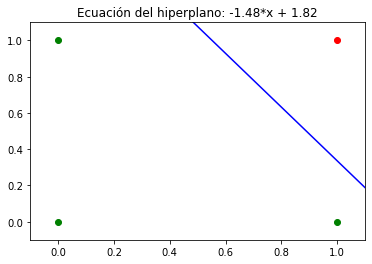


 ================ VALORES XOR ================
ENTRADA -> [0, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [0, 1]  EXPECTED -> 1  OBTENIDO -> 0
ENTRADA -> [1, 0]  EXPECTED -> 1  OBTENIDO -> 0
ENTRADA -> [1, 1]  EXPECTED -> 0  OBTENIDO -> 1


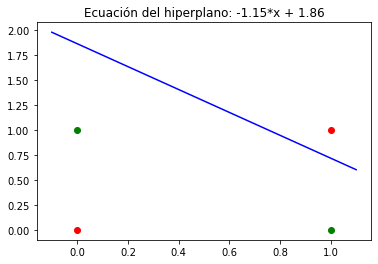

In [29]:
# AND
print("================ VALORES AND ================")
for entrada in entradas:
    print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] * entrada[1]) ," OBTENIDO ->", funcionActivacion(neurona_clasificar_and,entrada,umbral))
ec_hiperplano(1,neurona_clasificar_and,umbral)
# AND
print("\n ================ VALORES XOR ================")
for entrada in entradas:
    print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] ^ entrada[1]) ," OBTENIDO ->", funcionActivacion(neurona_clasificar_xor,entrada,umbral))
ec_hiperplano(0,neurona_clasificar_xor,umbral)

# Estudio Umbral

In [30]:
listadoUmbral = np.linspace(0,1,21)
listafinalAND = np.zeros(len(listadoUmbral))
listafinalXOR = np.zeros(len(listadoUmbral))
precision = 10000

for x in range(precision):
    listamediasAND = []
    listamediasXOR = []
    valor1_and = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_and =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_and = [valor1_and,valor2_and] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    valor1_xor = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_xor =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_xor = [valor1_xor,valor2_xor] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    for ubmral in listadoUmbral:
        errorAND = 0
        errorXOR = 0
        neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,ubmral,learning_rate,n_iteraciones,0)
        neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,ubmral,learning_rate,n_iteraciones,0)
        for entrada in entradas:
            expectedAND = entrada[0] * entrada[1]
            obtenidoAND = funcionActivacion(neurona_clasificar_and,entrada,ubmral)
            expectedXOR = entrada[0] ^ entrada[1]
            obtenidoXOR = funcionActivacion(neurona_clasificar_xor,entrada,ubmral)
            if obtenidoAND == expectedAND:
                errorAND += 1
            if obtenidoXOR == expectedAND:
                errorXOR += 1
        listamediasAND.append(errorAND/4)
        listamediasXOR.append(errorXOR/4)
    listafinalAND += np.array(listamediasAND)
    listafinalXOR += np.array(listamediasXOR)
listafinalAND = listafinalAND / precision
listafinalXOR = listafinalXOR / precision
plt.plot(listadoUmbral,listafinalAND)
plt.ylabel('Media de acierto')
plt.xlabel('Umbral')
plt.plot(listadoUmbral,listafinalXOR)
plt.ylabel('Media de acierto')
plt.xlabel('Umbral')
plt.title('Media de aciertos dependiendo de Umbral')
plt.legend(['AND', 'XOR'])

KeyboardInterrupt: 

Usaremos 0.6 de umbral ya que podemos ver una tendencia asintotica despues

# Estudio coef de aprendizaje

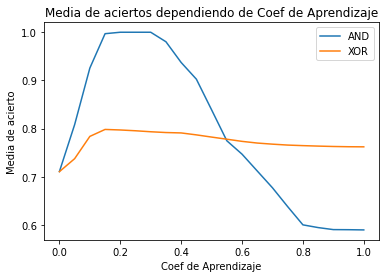

In [ ]:
umbralelegido = 0.6
listadoCoef =  np.linspace(0,1,21)
listafinalAND = np.zeros(len(listadoCoef))
listafinalXOR = np.zeros(len(listadoCoef))
precision = 10000

for x in range(precision):
    listamediasAND = []
    listamediasXOR = []
    valor1_and = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_and =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_and = [valor1_and,valor2_and] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    valor1_xor = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_xor =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_xor = [valor1_xor,valor2_xor] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    for coef in listadoCoef:
        errorAND = 0
        errorXOR = 0
        neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,umbralelegido,coef,n_iteraciones,0)
        neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,umbralelegido,coef,n_iteraciones,0)
        for entrada in entradas:
            expectedAND = entrada[0] * entrada[1]
            obtenidoAND = funcionActivacion(neurona_clasificar_and,entrada,umbralelegido)
            expectedXOR = entrada[0] ^ entrada[1]
            obtenidoXOR = funcionActivacion(neurona_clasificar_xor,entrada,umbralelegido)
            if obtenidoAND == expectedAND:
                errorAND += 1
            if obtenidoXOR == expectedAND:
                errorXOR += 1
        listamediasAND.append(errorAND/4)
        listamediasXOR.append(errorXOR/4)
    listafinalAND += np.array(listamediasAND)
    listafinalXOR += np.array(listamediasXOR)
listafinalAND = listafinalAND / precision
listafinalXOR = listafinalXOR / precision
plt.plot(listadoCoef,listafinalAND)
plt.plot(listadoCoef,listafinalXOR)
plt.ylabel('Media de acierto')
plt.xlabel('Coef de Aprendizaje')
plt.title('Media de aciertos dependiendo de Coef de Aprendizaje')
plt.legend(['AND', 'XOR'])

Nos quedamos con 0.1 ya que es el primer coef que consigue un 100% de aciertos

# Estudio Periodo

In [ ]:
umbralelegido = 0.6
coefelegido = 0.1
listadoperiodos = np.linspace(0,100,11)
listafinalAND = np.zeros(len(listadoperiodos))
listafinalXOR = np.zeros(len(listadoperiodos))
precision = 10000

for x in range(precision):
    listamediasAND = []
    listamediasXOR = []
    valor1_and = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_and =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_and = [valor1_and,valor2_and] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    valor1_xor = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    valor2_xor =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
    neurona_xor = [valor1_xor,valor2_xor] # Generamos una matriz de pesos aleatoria en intervalo -1,1
    for periodo in listadoperiodos:
        errorAND = 0
        errorXOR = 0
        neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,umbralelegido,coefelegido,int(periodo),0)
        neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,umbralelegido,coefelegido,int(periodo),0)
        for entrada in entradas:
            expectedAND = entrada[0] * entrada[1]
            obtenidoAND = funcionActivacion(neurona_clasificar_and,entrada,umbralelegido)
            expectedXOR = entrada[0] ^ entrada[1]
            obtenidoXOR = funcionActivacion(neurona_clasificar_xor,entrada,umbralelegido)
            if obtenidoAND == expectedAND:
                errorAND += 1
            if obtenidoXOR == expectedAND:
                errorXOR += 1
        listamediasAND.append(errorAND/4)
        listamediasXOR.append(errorXOR/4)
    listafinalAND += np.array(listamediasAND)
    listafinalXOR += np.array(listamediasXOR)
listafinalAND = listafinalAND / precision
listafinalXOR = listafinalXOR / precision
plt.plot(listadoperiodos,listafinalAND)
plt.plot(listadoperiodos,listafinalXOR)
plt.ylabel('Media de acierto')
plt.xlabel('Periodo')
plt.title('Media de aciertos dependiendo del Periodo')
plt.legend(['AND', 'XOR'])

KeyboardInterrupt: 